# <font color=#003d5c>Árboles de Decisión</font>


Es un algoritmo que proporciona una arquitectura condicional de varios niveles para el análisis predictivo mediante la evaluación de la ganancia de información incremental.

<img src="images/groot.gif"></img>

Piense en el árbol de decisión como un un árbol lleno de condiciones `if-else`. La condición más eficiente se encuentra en la parte superior y disminuye gradualmente a medida que descendemos (en la mayoría de los casos).

<font color=#003d5c>**¿Por qué aprenderemos Árboles de Decisión?**</font>

- Puede aplicarse a problemas de regresión y clasificación
- Tienen muchas propiedades útiles
- Son muy populares
- Son la base de modelos más complejos
- Tienen una forma diferente de "pensar" que los otros modelos que hemos estudiado

## <font color=#003d5c>Objetivos de la lección</font>

Los estudiantes podrán:

- Explicar cómo se crea un árbol de decisión
- Construir un modelo de árbol de decisión en scikit-learn
- Tunear un modelo de árbol de decisión y  explicar cómo el tuning impacta al modelo.
- Interpretar un diagrama de árbol
- Describir las diferencias principales entre los árboles de regresión y clasificación
- Decida si un árbol de decisión es un modelo apropiado para un problema dado

Esta parte teórica se puede revisar en el octavo capítulo del libro [**Introduction to Statistical Learning**](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf).

In [ ]:
from IPython.lib.display import YouTubeVideo

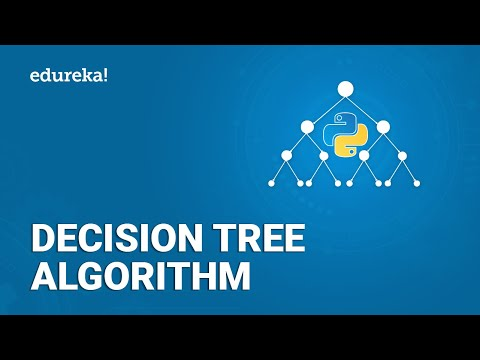

In [ ]:
YouTubeVideo('qDcl-FRnwSU', width=1000,height=400)

# <font color=#003d5c>1. Árboles de Regresión</font>

Datos de un jugador de Grandes Ligas de 1986-87::

- **Años** (eje x): número de años jugando en las ligas mayores
- **Hits** (eje y): número de hits en el año anterior
- **Salario** (color): el salario bajo es azul / verde, el salario alto es rojo / amarillo

![Salary data](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_color.png)

**Ejercicio grupal:**

- Los datos anteriores son nuestros **datos de entrenamiento**.
- Queremos construir un modelo que prediga el salario de **futuros jugadores** basado en años y Hits.
- Vamos a "segmentar" el grupo de características en regiones, y luego usar el **salario medio en cada región** como el salario previsto para los futuros jugadores.
- Se quiere **maximizar** la similitud (u "homogeneidad") dentro de una región determinada, y **minimizar** la similitud entre diferentes regiones.


**Reglas para segmentar:**

- Solo puedes usar **líneas rectas**, dibujadas una a la vez.
- Estas líneas deben ser verticales u horizontales.
- Una línea **se detiene** cuando golpea una línea existente.

![Salary regions](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_regions.png)

Arriba están las regiones creadas por una computadora::

- $R_1$: jugadores con **menos de 5 años** de experiencia, salario medio de **\$166,000**
- $R_2$: jugadores con **5 o más años** de experiencia y **menos de 118 visitas**, salario medio de **\$403,000**
- $R_3$: jugadores con **5 o más años** de experiencia y **118 hits o más**, Salario medio de **\$846,000**

**Nota:** Años y Hits son enteros, pero la convención es usar el **punto medio** entre valores adyacentes para etiquetar una división.

Estas regiones se usan para hacer predicciones sobre **datos fuera de la muestra**. ¡Por lo tanto, solo hay tres predicciones posibles! (¿Es esto diferente de cómo **la regresión lineal** hace predicciones?)

A continuación se muestra el árbol de regresión equivalente:

![Salary tree](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_tree.png)

La primera división es **Años <4.5**, por lo que esa división va en la parte superior del árbol. Cuando una regla de división es **Verdadero**, sigue la rama izquierda. Cuando una regla de división es **Falsa**, sigue la rama derecha.

Para los jugadores en la **rama izquierda**, el Salario medio es \$166,000, por lo que se etiqueta con ese valor. (El salario se ha dividido por 1000 y se ha transformado a 5.11 usando el logaritmo).

Para jugadores en la **rama derecha**, hay una división adicional en **Hits <117.5**, dividiendo jugadores en dos regiones Salario más: \$403,000 (transformado a 6.00), y \$846,000 (transformado a 6.74).

![Salary tree annotated](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_tree_annotated.png)

**¿Qué le dice este árbol acerca de sus datos?¿Qué insights puedes obtener?**

- Años es el factor más importante que determina el Salario, con un menor número de años correspondientes a un Salario inferior.
- Para un jugador con un número menor de años, Hits no es un factor importante que determina el salario.
- Para un jugador con un mayor número de años, Hits es un factor importante que determina el salario, con un mayor número de Hits correspondientes a un salario más alto.

**Pregunta del Millón:** ¿Qué le gusta y qué le desagrada de los árboles de decisión hasta el momento?

## <font color=#003d5c>I. Construir un árbol de regresión a mano</font>

Los **datos de entrenamiento** están en un pequeño dataset de [precios de venta de vehículos usados](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_train.csv). Su meta es **predecir el precio** para los datos de prueba.

1. Lea los datos en un DataFrame.
2. Explore los datos por medio de gráficas, o agrupaciones (recordar el uso del `group_by`).
3. Decida qué característica es el predictor más importante y utilícela para crear su primera regla de división.
    - Solo se permiten divisiones binarias.
4. Después de hacer su primera división, divida su DataFrame en dos partes y luego explore cada parte para descubrir qué otras divisiones hacer.
5. Deje de hacer divisiones una vez que esté convencido de que logra un buen equilibrio entre el ajuste insuficiente (underfitting) y el ajuste excesivo (overfitting).
    - Tu objetivo es construir un modelo que generalice bien.
    - ¡Puedes dividir la misma variable varias veces!
6. Dibuje su árbol, etiquetando las hojas con el precio promedio de las observaciones en esa región.
    - Asegúrate de que nada esté al revés: sigue la **rama izquierda** si la regla es verdadera, y la **rama derecha** si la regla es falsa.

## <font color=#003d5c>¿Cómo construye una computadora un árbol de regresión?</font>

**Enfoque ideal:** Considera cada posible partición del grupo de características (no factible computacionalmente)

**Enfoque "suficientemente bueno":** división binaria recursiva

1. Comienza en la parte superior del árbol
2. Para **cada característica**, examina **todos los puntos de corte posibles**, y elige la característica y el punto de corte para que el árbol resultante tenga el error cuadrático medio (MSE) más bajo posible.
3. Examina las dos regiones resultantes, y nuevamente haga una **división simple** (en una de las regiones) para minimizar el MSE.
4. Continúa repitiendo el paso 3 hasta que se cumpla un **criterio de detención**:
    - profundidad máxima del árbol (número máximo de divisiones requeridas para llegar a una hoja)
    - número mínimo de observaciones en una hoja

### <font color=#003d5c>Aplicación de la lógica: Elegir el punto de corte ideal para una característica dada</font>

In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_train.csv'
train = pd.read_csv(url, encoding="latin1")

In [ ]:
train.head()

,price,year,miles,doors,vtype
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [ ]:
train['vtype'].value_counts()

car      11
truck     3
Name: vtype, dtype: int64

In [ ]:
train['vtype'].unique()

array(['car', 'truck'], dtype=object)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   14 non-null     int64 
 1   year    14 non-null     int64 
 2   miles   14 non-null     int64 
 3   doors   14 non-null     int64 
 4   vtype   14 non-null     object
dtypes: int64(4), object(1)
memory usage: 688.0+ bytes


In [ ]:
train["vtype"].value_counts()

car      11
truck     3
Name: vtype, dtype: int64

In [ ]:
# Codificar "car" como 0 y "truck" como 1
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [ ]:
# Antes de hacer las divisiones, calculemos la media de todo el dataset para que sea nuestra valor de predicción
train['prediction'] = train.price.mean()
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,0,6571.428571
1,14000,2010,30000,2,0,6571.428571
2,13000,2010,73500,4,0,6571.428571
3,9500,2009,78000,4,0,6571.428571
4,9000,2007,47000,4,0,6571.428571
5,4000,2006,124000,2,0,6571.428571
6,3000,2004,177000,4,0,6571.428571
7,2000,2004,209000,4,1,6571.428571
8,3000,2003,138000,2,0,6571.428571
9,1900,2003,160000,4,0,6571.428571


**<font color=#003d5c>Calcular el error (MSE):</font>**

In [ ]:
(((train['price'] - train['prediction'])**2).mean()) ** 0.5

5936.981985995983

**<font color=#003d5c>a) Elegir nuestra primera mejor división:</font>**
<br><br>
Por ejemplo dividamos todo el dataset por la variable `year` y el valor de `2010` y calculemos los promedios del precio en las 2 regiones obtenidas y asignarles como valor de predicción en la variable `pred`.

In [ ]:
year = 2010
train.loc[train.year < year, 'pred'] = train.loc[train.year < year, 'price'].mean()
train.loc[train.year >=year, 'pred'] = train.loc[train.year >=year, 'price'].mean()

(((train['price'] - train['pred'])**2).mean()) ** 0.5

3042.7402778200435

<font color=#003d5c>Región de la Izquierda:</font>

In [ ]:
train_izq = train.loc[train.year<2010].copy()

In [ ]:
train_izq.year.unique()

array([2009, 2007, 2006, 2004, 2003, 2001, 1999, 1997])

<font color=#003d5c>Región de la Derecha:</font>

In [ ]:
train_der = train.loc[train.year>=2010].copy()

In [ ]:
train_der.year.unique()

array([2012, 2010])

Definamos una función que nos permite calcular el error obtenido por la división en 2 regiones en base a un valor de la variable `year`.

In [ ]:
def error_año(train, year):
    train.loc[train.year <year, 'pred'] = train.loc[train.year <year, 'price'].mean()
    train.loc[train.year>=year, 'pred'] = train.loc[train.year>=year, 'price'].mean()
    return((((train['price'] - train['pred'])**2).mean()) ** 0.5)

In [ ]:
train.year.unique()

array([2012, 2010, 2009, 2007, 2006, 2004, 2003, 2001, 1999, 1997])

In [ ]:
error_min = float('inf')
year_split = 0
for year in train.year.unique():
    error_año_var = error_año(train, year)
    print(year, ": ", error_año_var)
    if error_año_var < error_min:
        error_min = error_año_var
        year_split = year
print("Se debe hacer la división por el valor de ", year_split, "ya que genera 2 regiones que nos permiten obtener un error de ", error_min)

2012 :  4115.449316529493
2010 :  3042.7402778200435
2009 :  3050.2049111494134
2007 :  2928.8656453060403
2006 :  3717.4019665557266
2004 :  4828.983058673159
2003 :  5582.125927469737
2001 :  5571.830724191791
1999 :  5754.148049904502
1997 :  5936.981985995983
Se debe hacer la división por el valor de  2007 ya que genera 2 regiones que nos permiten obtener un error de  2928.8656453060403


**<font color=#003d5c>b) Evaluar el punto de corte con el MSE más bajo:</font>**

¿Pero es correcto que hayamos elegido la variable `year`?

In [ ]:
train.head()

,price,year,miles,doors,vtype,prediction,pred
0,22000,2012,13000,2,0,6571.428571,6571.428571
1,14000,2010,30000,2,0,6571.428571,6571.428571
2,13000,2010,73500,4,0,6571.428571,6571.428571
3,9500,2009,78000,4,0,6571.428571,6571.428571
4,9000,2007,47000,4,0,6571.428571,6571.428571


In [ ]:
def error_split(train, var, value):
    train.loc[train[var] <value, 'pred'] = train.loc[train[var] <value, 'price'].mean()
    train.loc[train[var]>=value, 'pred'] = train.loc[train[var]>=value, 'price'].mean()
    return ((((train['price'] - train['pred'])**2).mean()) ** 0.5)

In [ ]:
error_min, var_final, val_final = float('inf'), '', 0
for var_ in ['year', 'miles', 'doors', 'vtype']:
    print('-------------{}-------------'.format(var_))
    for val_ in train[var_].unique():
        error = error_split(train, var_, val_)
        print(val_, ": ", error)
        if error < error_min:
            error_min = error
            var_final, val_final = var_, val_
print("\n--------------------------------------------------")
print("Se debe hacer la división por el valor de ", val_final, " de la variable ", var_final, " ya que genera 2 regiones que nos permiten obtener un error de ", error_min)

-------------year-------------
2012 :  4115.449316529493
2010 :  3042.7402778200435
2009 :  3050.2049111494134
2007 :  2928.8656453060403
2006 :  3717.4019665557266
2004 :  4828.983058673159
2003 :  5582.125927469737
2001 :  5571.830724191791
1999 :  5754.148049904502
1997 :  5936.981985995983
-------------miles-------------
13000 :  5936.981985995983
30000 :  4115.449316529493
73500 :  4603.104542433446
78000 :  3880.3125385496196
47000 :  3671.3822491055894
124000 :  3530.146530076269
177000 :  5543.1834821592465
209000 :  5800.018946539725
138000 :  4032.7485942579897
160000 :  4982.451745559147
190000 :  5668.800368600716
62000 :  3984.0917425414564
163000 :  5294.798660680391
-------------doors-------------
2 :  5936.981985995983
4 :  5827.257890621414
-------------vtype-------------
0 :  5936.981985995983
1 :  5458.473693711005

--------------------------------------------------
Se debe hacer la división por el valor de  2007  de la variable  year  ya que genera 2 regiones que no

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'RMSE (más pequeño es mejor)')

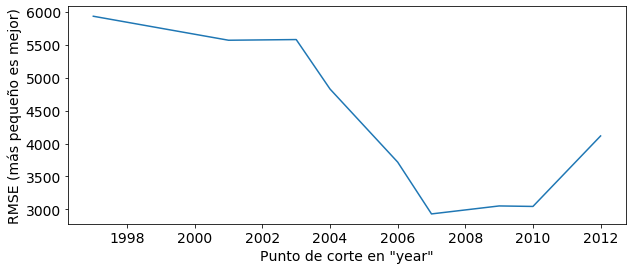

In [ ]:
# Graficar la variable 'year' (eje-X) versus RMSE (eje-y)
values = train['year'].unique()
errors = [error_split(train, 'year', v) for v in values]
plt.plot(values, errors)
plt.xlabel('Punto de corte en "year"')
plt.ylabel('RMSE (más pequeño es mejor)')

**<font color=#003d5c>c) Examina las 2 regiones resultantes:</font>**

In [ ]:
train_izq = train.loc[train['year'] <2007, :]
train_der = train.loc[train['year']>=2007, :]

In [ ]:
train_izq.head()

,price,year,miles,doors,vtype,prediction,pred
5,4000,2006,124000,2,0,6571.428571,7790.909091
6,3000,2004,177000,4,0,6571.428571,7790.909091
7,2000,2004,209000,4,1,6571.428571,2100.000000
8,3000,2003,138000,2,0,6571.428571,7790.909091
9,1900,2003,160000,4,0,6571.428571,7790.909091


**<font color=#003d5c>d) Evaluar si se cumple criterio de detención:</font>**

In [ ]:
train_izq.shape

(9, 7)

In [ ]:
train_der.shape

(5, 7)

**<font color=#003d5c>Continuar el Ciclo:</font>**
<br><br>Con la región de la Izquierda

In [ ]:
error_min, var_final, val_final = float('inf'), '', 0
for var_ in ['year', 'miles', 'doors', 'vtype']:
    print('-------------{}-------------'.format(var_))
    for val_ in train_izq[var_].unique():
        error = error_split(train_izq, var_, val_)
        print(val_, ": ", error)
        if error < error_min:
            error_min = error
            var_final, val_final = var_, val_
print("\n--------------------------------------------------")
print("Se debe hacer la división por el valor de ", val_final, " de la variable ", var_final, " ya que genera 2 regiones que nos permiten obtener un error de ", error_min)

-------------year-------------
2006 :  1014.2731387550397
2004 :  1092.8216960050065
2003 :  1110.2218663819374
2001 :  916.6450213894664
1999 :  989.9494936611666
1997 :  1110.3330609203888
-------------miles-------------
124000 :  764.3988196979084
177000 :  1099.157926845887
209000 :  1080.5734074503634
138000 :  574.3180911666199
160000 :  970.6527013647398
190000 :  1081.2617556017526
62000 :  1110.3330609203888
163000 :  1051.9558503621295
-------------doors-------------
2 :  1110.3330609203888
4 :  1106.52107476039
-------------vtype-------------
0 :  1110.3330609203888
1 :  1019.4406599990306

--------------------------------------------------
Se debe hacer la división por el valor de  138000  de la variable  miles  ya que genera 2 regiones que nos permiten obtener un error de  574.3180911666199


In [ ]:
train_izq_izq = train_izq.loc[train_izq['miles']< 138000]
train_izq_der = train_izq.loc[train_izq['miles']>=138000]

In [ ]:
print(train_izq_izq.shape)
print(train_izq_der.shape)

(2, 7)
(7, 7)


Con la región de la Derecha

In [ ]:
error_min, var_final, val_final = float('inf'), '', 0
for var_ in ['year', 'miles', 'doors', 'vtype']:
    print('-------------{}-------------'.format(var_))
    for val_ in train_der[var_].unique():
        error = error_split(train_der, var_, val_)
        print(val_, ": ", error)
        if error < error_min:
            error_min = error
            var_final, val_final = var_, val_
print("\n--------------------------------------------------")
print("Se debe hacer la división por el valor de ", val_final, " de la variable ", var_final, " ya que genera 2 regiones que nos permiten obtener un error de ", error_min)

-------------year-------------
2012 :  1933.2614929181204
2010 :  3123.833115474214
2009 :  4091.148982865327
2007 :  4669.047011971501
-------------miles-------------
13000 :  4669.047011971501
30000 :  1933.2614929181204
73500 :  4292.43520626695
78000 :  4219.004621945797
47000 :  2880.972058177587
-------------doors-------------
2 :  4669.047011971501
4 :  2880.972058177587
-------------vtype-------------
0 :  4669.047011971501

--------------------------------------------------
Se debe hacer la división por el valor de  2012  de la variable  year  ya que genera 2 regiones que nos permiten obtener un error de  1933.2614929181204


In [ ]:
train_der_izq = train_der.loc[train_der['year']< 2012]
train_der_der = train_der.loc[train_der['year']>=2012]

In [ ]:
train_der_izq = train_der.loc[train_der['miles']< 30000]
train_der_der = train_der.loc[train_der['miles']>=30000]

In [ ]:
print(train_der_izq.shape)
print(train_der_der.shape)

(1, 7)
(4, 7)


<div class="alert alert-info" role="alert">
  <strong>Recordar:</strong> Antes de cada división, este proceso se repite para cada característica, y se eligen la característica y el punto de corte que produce la `RMSE` más baja.
</div>

## <font color=#003d5c>II. Construyendo un árbol de regresión en scikit-learn</font>

Definir nuestro dataset de Entrenamiento y el Target

In [ ]:
train.head()

,price,year,miles,doors,vtype,prediction,pred
0,22000,2012,13000,2,0,6571.428571,7790.909091
1,14000,2010,30000,2,0,6571.428571,7790.909091
2,13000,2010,73500,4,0,6571.428571,7790.909091
3,9500,2009,78000,4,0,6571.428571,7790.909091
4,9000,2007,47000,4,0,6571.428571,7790.909091


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       14 non-null     int64  
 1   year        14 non-null     int64  
 2   miles       14 non-null     int64  
 3   doors       14 non-null     int64  
 4   vtype       14 non-null     int64  
 5   prediction  14 non-null     float64
 6   pred        14 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 912.0 bytes


In [ ]:
predictores = ['year', 'miles', 'doors', 'vtype']
X = train[predictores]
y = train.price

In [ ]:
# Instanciar un objeto de la clase DecisionTreeRegressor (con random_state=1)
from sklearn import tree
treereg = tree.DecisionTreeRegressor(random_state=1, max_depth=2,
                                criterion='mse')
treereg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
treereg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
predictores

['year', 'miles', 'doors', 'vtype']

[Text(334.79999999999995, 181.2, 'X[0] <= 2006.5\nmse = 35247755.102\nsamples = 14\nvalue = 6571.429'),
 Text(223.2, 108.72, 'X[1] <= 149000.0\nmse = 1232839.506\nsamples = 9\nvalue = 2722.222'),
 Text(111.6, 36.23999999999998, 'mse = 1866875.0\nsamples = 4\nvalue = 3325.0'),
 Text(334.79999999999995, 36.23999999999998, 'mse = 202400.0\nsamples = 5\nvalue = 2240.0'),
 Text(446.4, 108.72, 'mse = 21800000.0\nsamples = 5\nvalue = 13500.0')]

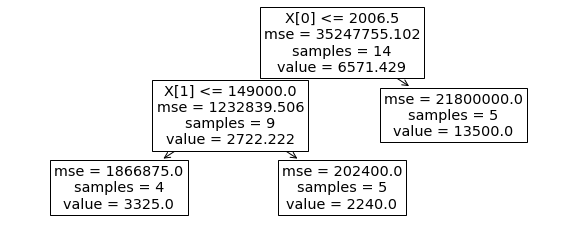

In [ ]:
tree.plot_tree(treereg)

In [ ]:
!pip3 install graphviz

  Using cached graphviz-0.13.2-py2.py3-none-any.whl (17 kB)


Visualizar el Árbol de Regresión

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

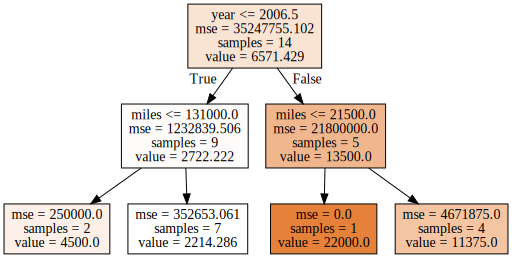

In [ ]:
graph = Source( export_graphviz(treereg, out_file=None,
                                feature_names=predictores, filled=True))
SVG(graph.pipe(format='svg'))

Leyendo los nodos internos:

- **samples:** cantidad de observaciones en ese nodo antes de dividir
- **mse:** MSE calculado al comparar los valores de respuesta reales en ese nodo con el valor de respuesta promedio en ese nodo
- **regla:** regla utilizada para dividir ese nodo (ir a la izquierda si es verdadero, ir a la derecha si es falso)

Leyendo las hojas:

- **samples:** cantidad de observaciones en ese nodo
- **value:** valor de respuesta promedio en ese nodo
- **mse:** MSE calculado al comparar los valores de respuesta reales en ese nodo contra "value"

## <font color=#003d5c>III. Tunning en un árbol de regresión usando scikit-learn</font>

```python
Usando  for
```

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
error_list = []
for max_depth in range(1, 9):
    treereg = tree.DecisionTreeRegressor(random_state=1, max_depth=max_depth, criterion='mse')
    treereg.fit(X, y)
    error = np.sqrt(mean_squared_error(y, treereg.predict(X)))
    error_list.append(error)
    print('max_depth={}, error={}'.format(max_depth, error))


max_depth=1, error=2928.8656453060403
max_depth=2, error=1243.729168628749
max_depth=3, error=364.2997196187306
max_depth=4, error=234.5207879911715
max_depth=5, error=188.9822365046136
max_depth=6, error=94.4911182523068
max_depth=7, error=0.0
max_depth=8, error=0.0


Text(0, 0.5, 'RMSE (más pequeño es mejor)')

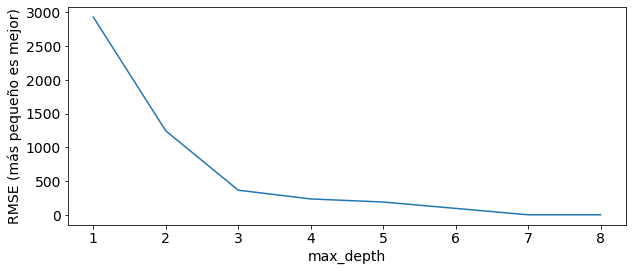

In [ ]:
# Graficar la variable 'year' (eje-X) versus RMSE (eje-y)
import matplotlib.pyplot as plt
values = range(1, 9)
plt.plot(values, error_list)
plt.xlabel('max_depth')
plt.ylabel('RMSE (más pequeño es mejor)')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treereg = tree.DecisionTreeRegressor(random_state=1,
                                max_depth=max_depth,
                                criterion='mse')
parameters = {'max_depth': list(range(1, 9))}
#parameters = {'max_depth': [1,2]}

In [ ]:
clf = GridSearchCV(treereg, parameters, cv=4)

In [ ]:
clf.fit(X, y)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=8, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3107.1428571428573

## <font color=#003d5c>¿Qué sucede cuando generamos un árbol demasiado profundo?</font>

- Izquierda: Árbol de regresión para Salario **crecimiento más profundo**
- Derecha: Comparación de **errores de entrenamiento, prueba y validación cruzada** para árboles con diferentes números de hojas

![Salary tree grown deep](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_tree_deep.png)

El **error de entrenamiento** continúa disminuyendo a medida que aumenta el tamaño del árbol (debido al sobreajuste), pero el error **de validación cruzada** más bajo ocurre para un árbol con 3 hojas.

## Tuning: Ajustando un árbol de regresión

Tratemos de reducir el RMSE ajustando el parámetro **max_depth**:

In [ ]:
# prueba diferentes valores uno a uno
treereg = tree.DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4050.1443001443

O bien, podríamos hacer un bucle para probar un rango de valores:

In [ ]:
# lista de valores para probar
max_depth_range = range(1, 8)

# lista para almacenar el RMSE promedio para cada valor de max_depth
RMSE_scores = []

# use LOOCV con cada valor de max_depth
for depth in max_depth_range:
    treereg = tree.DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

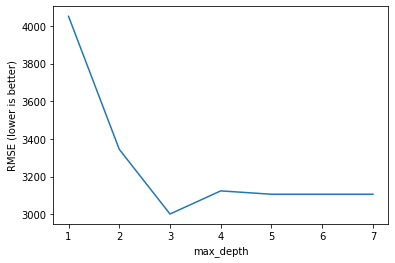

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [ ]:
# max_depth = 3 fue el mejor, así que ajuste un árbol usando ese parámetro
treereg = tree.DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
# "Importancia de Gini" de cada característica: la reducción total de errores (normalizada) provocada por esa característica
pd.DataFrame({'feature':predictores, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,vtype,0.000000


## Hacer predicciones para los datos de prueba

In [ ]:
# Leer la data de prueba
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_test.csv'
test = pd.read_csv(url)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


**Pregunta: ** Usando el diagrama de árbol de arriba, ¿qué predicciones hará el modelo para cada observación?

In [ ]:
# utilizar el modelo ajustado para hacer predicciones sobre los datos de prueba
X_test = test[predictores]
y_test = test.price
y_pred = treereg.predict(X_test)
y_pred

array([ 4000.,  5000., 13500.])

In [ ]:
# calcular RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

1190.2380714238084